In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
data = pd.read_csv('../data/train.csv')

In [60]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
data = np.array(data)

m, n = data.shape
np.random.shuffle(data)

data_dev = data[:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[1000:].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

m

42000

In [62]:
def init_params():
    W1 = np.random.rand(10, 28*28) - 0.5 # 10 neurons, 784 weights
    b1 = np.random.rand(10, 1) - 0.5 # 10 neurons, 1 bias

    W2 = np.random.rand(10, 10) - 0.5 # 10 neurons, 10 weights
    b2 = np.random.rand(10, 1) - 0.5 # 10 neurons, 1 bias

    return (W1, b1, W2, b2)


In [63]:
def ReLU(x):
    return np.maximum(x, 0)

def dReLU(x):
    return x > 0

def softmax(x):
    return np.exp(x) / sum(np.exp(x))

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def onehot(y):
    y_onehot = np.zeros((y.size, y.max()+1))
    y_onehot[np.arange(y.size), y] = 1
    return y_onehot.T


In [64]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)

    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2


def backward_prop(X, Y, W1, b1, W2, b2, Z1, A1, Z2, A2):
    m = Y.size
    one_hot_Y = onehot(Y)

    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)


    dZ1 = W2.T.dot(dZ2) * dReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)


    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate=0.1):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return W1, b1, W2, b2



In [65]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.mean(predictions == Y)

In [66]:
def gradient_descent(X, Y, iterations=100, learning_rate=0.1):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(X, Y, W1, b1, W2, b2, Z1, A1, Z2, A2)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if i % 10 == 0:
            print(f'Iteration {i}')
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))

    return W1, b1, W2, b2

In [67]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train,  iterations=1000, learning_rate=0.1)

Iteration 0
[0 0 0 ... 0 0 0] [1 5 2 ... 2 3 0]
0.06919512195121952
Iteration 10
[4 7 6 ... 7 3 2] [1 5 2 ... 2 3 0]
0.18297560975609756
Iteration 20
[4 7 6 ... 8 3 7] [1 5 2 ... 2 3 0]
0.297390243902439
Iteration 30
[1 0 6 ... 8 3 0] [1 5 2 ... 2 3 0]
0.4043658536585366
Iteration 40
[1 8 6 ... 8 3 0] [1 5 2 ... 2 3 0]
0.47809756097560974
Iteration 50
[1 8 6 ... 1 3 0] [1 5 2 ... 2 3 0]
0.5354390243902439
Iteration 60
[1 8 6 ... 1 3 0] [1 5 2 ... 2 3 0]
0.5769268292682926
Iteration 70
[1 8 6 ... 1 0 0] [1 5 2 ... 2 3 0]
0.6095609756097561
Iteration 80
[1 5 6 ... 1 2 0] [1 5 2 ... 2 3 0]
0.6365121951219512
Iteration 90
[1 5 6 ... 1 2 0] [1 5 2 ... 2 3 0]
0.6599756097560976
Iteration 100
[1 5 6 ... 1 2 0] [1 5 2 ... 2 3 0]
0.6807317073170732
Iteration 110
[1 5 2 ... 1 2 0] [1 5 2 ... 2 3 0]
0.697780487804878
Iteration 120
[1 5 2 ... 1 2 0] [1 5 2 ... 2 3 0]
0.7132926829268292
Iteration 130
[1 5 2 ... 1 2 0] [1 5 2 ... 2 3 0]
0.7254634146341463
Iteration 140
[1 5 2 ... 1 2 0] [1 5 2 ... 2

In [68]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y_train[index]
    print(f"Prediction : {prediction}")
    print(f"True : {label}")

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction : [4]
True : 4


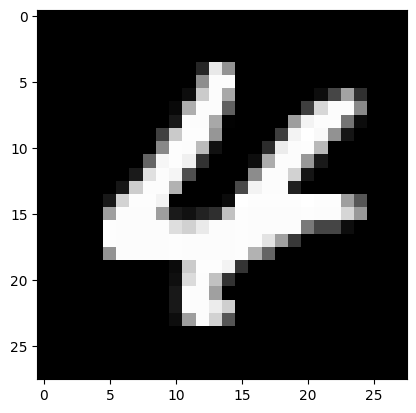

Prediction : [9]
True : 9


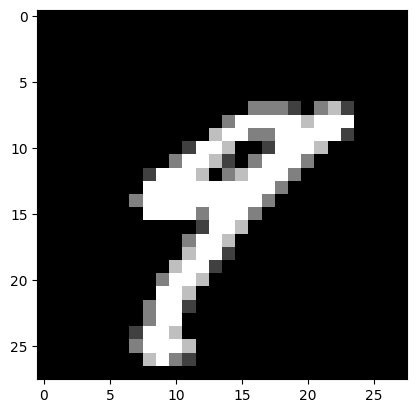

Prediction : [6]
True : 6


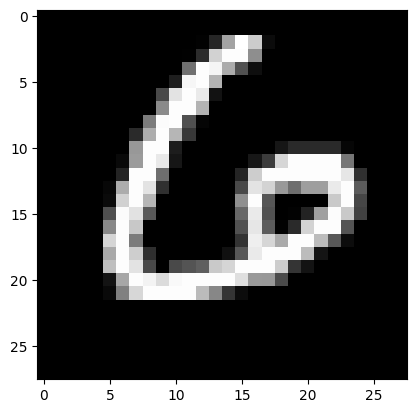

Prediction : [6]
True : 6


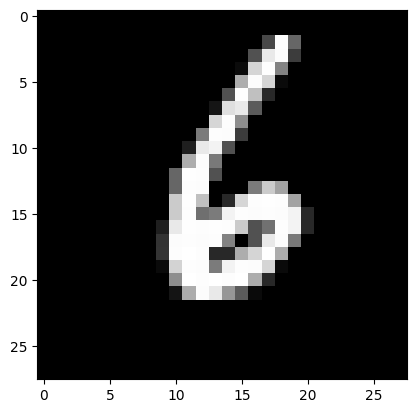

In [73]:

test_prediction(6, W1, b1, W2, b2)
test_prediction(8, W1, b1, W2, b2)
test_prediction(200, W1, b1, W2, b2)
test_prediction(18000, W1, b1, W2, b2)

In [70]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[0 2 0 1 1 1 3 4 1 3 4 0 1 3 2 3 2 0 3 2 1 2 2 1 5 3 2 0 2 2 1 1 0 3 2 0 2
 2 2 0 3 0 1 2 0 0 0 0 0 1 1 0 0 1 2 0 0 3 3 2 1 0 2 3 1 1 3 2 0 1 4 0 1 4
 3 1 3 5 2 0 2 1 0 0 5 2 0 1 1 1 0 1 2 2 0 0 0 3 2 4 1 2 4 0 2 2 1 2 0 4 0
 2 0 2 0 0 2 2 1 3 0 2 1 0 1 4 1 1 2 0 3 0 3 0 3 3 1 1 2 0 1 1 2 1 1 0 3 2
 2 1 1 2 0 2 0 2 1 2 1 0 1 3 2 0 1 1 1 1 0 0 1 2 0 1 1 4 0 2 2 1 2 0 1 1 3
 1 0 2 2 0 2 3 0 2 2 2 2 2 1 1 2 3 1 2 0 3 1 2 2 4 1 3 4 2 2 1 2 0 0 1 4 1
 2 2 0 2 2 0 3 2 0 0 4 0 0 0 3 1 0 2 2 1 0 1 2 1 0 1 1 2 2 0 2 3 1 3 0 0 1
 0 1 2 1 2 1 1 4 3 0 0 2 2 4 2 2 1 0 3 2 0 3 2 2 0 2 1 0 0 2 3 1 1 1 4 2 0
 0 2 1 0 2 2 1 1 2 2 4 0 0 0 0 3 0 1 1 0 0 0 4 1 2 1 2 1 0 2 3 2 2 2 1 2 0
 0 1 1 1 3 2 2 1 3 0 2 1 1 1 1 1 0 0 1 0 0 0 3 3 0 3 1 2 2 0 1 0 0 1 0 1 0
 4 2 2 0 4 1 4 2 0 1 2 5 0 2 2 2 2 4 2 0 3 3 2 1 3 3 3 2 0 2 2 1 1 2 4 2 0
 1 2 3 0 5 0 3 0 0 4 0 1 4 0 4 2 1 2 4 0 2 1 3 2 2 1 1 1 1 1 0 1 0 2 2 0 2
 0 2 4 1 3 0 2 3 0 2 5 0 1 2 0 3 0 3 2 0 0 4 2 1 2 1 4 3 2 2 4 1 0 2 0 2 0
 1 0 1 0 1 1 2 2 1 0 2 0 

/var/folders/q0/t0rszn4j4lj2h8p868fzf6wm0000gn/T/ipykernel_35788/2484448014.py:8: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / sum(np.exp(x))
/var/folders/q0/t0rszn4j4lj2h8p868fzf6wm0000gn/T/ipykernel_35788/2484448014.py:8: RuntimeWarning: invalid value encountered in divide
  return np.exp(x) / sum(np.exp(x))


0.32

In [75]:
np.random.rand(10, 1) - 0.5

array([[-0.37295718],
       [ 0.03854034],
       [-0.31970145],
       [-0.24232514],
       [-0.46504925],
       [ 0.02871512],
       [-0.49774063],
       [ 0.09858806],
       [ 0.34841597],
       [-0.04111564]])